In [2]:
import os
import sys
sys.path = ['/nfs/gns/homes/willj/anaconda3/envs/GTEx/lib/python3.5/site-packages'] + sys.path
GTEx_directory = '/hps/nobackup/research/stegle/users/willj/GTEx'
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import h5py
from scipy.stats import pearsonr
import statsmodels.stats.multitest as smm
import seaborn
import pickle

In [3]:
[raw_most_expressed_transcript_idx, raw_most_varying_feature_idx, raw_results] = pickle.load(open(GTEx_directory + '/data/raw_quick_pvalues.py','rb'))
[retrained_most_expressed_transcript_idx, retrained_most_varying_feature_idx, retrained_results] = pickle.load(open(GTEx_directory + '/data/retrained_quick_pvalues.py','rb'))

In [15]:
smm.multipletests(retrained_results['{}_{}_{}'.format('mean','128','pvalues')].flatten(),method='bonferroni',alpha=1e-6)[0]

array([False, False, False, ..., False, False, False], dtype=bool)

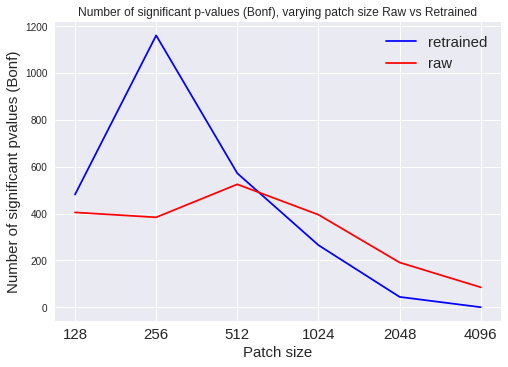

In [34]:
sizes = [128,256,512,1024,2048,4096]
plt.title("Number of significant p-values (Bonf), varying patch size. Raw vs Retrained Inceptionet")
plt.plot([sum(smm.multipletests(retrained_results['{}_{}_{}'.format('mean',s,'pvalues')].flatten(),method='bonferroni',alpha=1e-6)[0]) for s in sizes],c='blue',label='retrained')
plt.plot([sum(smm.multipletests(raw_results['{}_{}_{}'.format('mean',s,'pvalues')].flatten(),method='bonferroni',alpha=1e-6)[0]) for s in sizes],c='red', label='raw')
plt.xlabel('Patch size',size=15)
plt.ylabel('Number of significant pvalues (Bonf)',size=15)
plt.xticks(range(len(sizes)),sizes,size=15)
plt.legend(fontsize=15)
plt.show()